# Import Libraries and Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [5]:
file = 'KPMG_VI_New_raw_data_update_final.xlsx'
sheet_name = 'NewCustomerList'
df = pd.read_excel(file, sheet_name, skiprows=1)

In [6]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


# Exploratory Data Analysis

## Data Cleaning

### Drop Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [11]:
column_drop = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']                        
df.drop(column_drop, axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

### Missing Values

In [13]:
df.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [14]:
# Replace missing last names with corresponding first names
df.loc[df['last_name'].isnull(), 'last_name'] = df['first_name']

In [15]:
df['last_name'].isnull().sum()

0

In [16]:
df['DOB'].value_counts()

1998-02-05    2
1978-01-15    2
1977-11-08    2
1951-11-28    2
1979-07-28    2
             ..
1945-08-08    1
1943-08-27    1
1999-10-24    1
1976-01-24    1
1955-10-02    1
Name: DOB, Length: 958, dtype: int64

In [17]:
# Replace missing DOB with value from previous rows
df['DOB'].fillna(method='ffill', inplace=True)

In [18]:
df['DOB'].isnull().sum()

0

In [19]:
df['job_title'].value_counts()

Associate Professor         15
Environmental Tech          14
Software Consultant         14
Chief Design Engineer       13
Assistant Manager           12
                            ..
Accountant II                1
Programmer IV                1
Administrative Officer       1
Accounting Assistant III     1
Web Developer I              1
Name: job_title, Length: 184, dtype: int64

In [20]:
# Replace missing job_title with value from previous rows
df['job_title'].fillna(method='ffill', inplace=True)

In [21]:
df['job_title'].isnull().sum()

0

In [22]:
df['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [24]:
# Replace missing job_indsutry_category with value from previous rows
df['job_industry_category'].fillna(method='ffill', inplace=True)
df['job_industry_category'].isnull().sum()

0

### Identify Duplicates

In [25]:
dups = df.duplicated()
df[dups].sum()

first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
address                                0.0
postcode                               0.0
state                                  0.0
country                                0.0
property_valuation                     0.0
Rank                                   0.0
Value                                  0.0
dtype: float64

### Data Formatting

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  1000 non-null   datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

### Identify Inconsistencies

In [27]:
def analyze_unique_values(data_frame):
    """
    Analyzes and prints unique values in each column of the given DataFrame.
    
    Parameters:
        data_frame (pandas.DataFrame): The DataFrame to analyze.
    """
    for col in data_frame.columns:
        unique_count = data_frame[col].nunique()
        data_type = data_frame[col].dtypes

        print("Column: {}".format(col))
        print("Unique Values Count: {}".format(unique_count))
        print("Data Type: {}".format(data_type))

        if data_type in ['int64', 'float', 'object']:
            unique_values = data_frame[col].unique()[:5]  # Display the first 5 unique values
            print("Unique Values:")
            for value in unique_values:
                print("- {}".format(value))

            if unique_count > 5:
                print("... and {} more unique values".format(unique_count - 5))

        print("------------------------------------------------------------")


In [28]:
analyze_unique_values(df)

Column: first_name
Unique Values Count: 940
Data Type: object
Unique Values:
- Chickie
- Morly
- Ardelis
- Lucine
- Melinda
... and 935 more unique values
------------------------------------------------------------
Column: last_name
Unique Values Count: 989
Data Type: object
Unique Values:
- Brister
- Genery
- Forrester
- Stutt
- Hadlee
... and 984 more unique values
------------------------------------------------------------
Column: gender
Unique Values Count: 3
Data Type: object
Unique Values:
- Male
- Female
- U
------------------------------------------------------------
Column: past_3_years_bike_related_purchases
Unique Values Count: 100
Data Type: int64
Unique Values:
- 86
- 69
- 10
- 64
- 34
... and 95 more unique values
------------------------------------------------------------
Column: DOB
Unique Values Count: 958
Data Type: datetime64[ns]
------------------------------------------------------------
Column: job_title
Unique Values Count: 184
Data Type: object
Unique Values:

In [29]:
df['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [30]:
# Replace 'Unspecified' gender to highest gender
df['gender'].replace({'U': 'Female'}, inplace=True)

## Feature Engineering

In [33]:
df['DOB'].value_counts()

1963-08-25    3
1971-04-26    2
1959-09-18    2
1951-11-28    2
1987-01-15    2
             ..
1945-08-08    1
1943-08-27    1
1999-10-24    1
1976-01-24    1
1955-10-02    1
Name: DOB, Length: 958, dtype: int64

In [34]:
# Calculate age based on reference year 2023
reference_year = pd.to_datetime('2023-08-25')  # Assuming the reference year is August 25, 2023
df['age'] = (reference_year - df['DOB']).dt.days // 365

In [35]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57


In [36]:
df['age'].value_counts()

49    29
45    29
50    25
48    25
42    24
      ..
85     7
37     6
39     6
21     6
74     5
Name: age, Length: 65, dtype: int64

In [37]:
# Define age class ranges
bins = [20, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Create 'age_class' column based on age class ranges
df['age_class'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

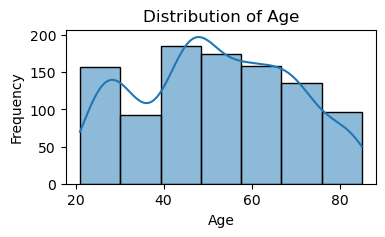

In [38]:
bin_value = df['age_class'].nunique()

# Create a histogram of the 'tenure' column
plt.figure(figsize=(4, 2))
sns.histplot(data=df, x='age', bins=bin_value,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [39]:
df[["age_class"]] = df[["age_class"]].astype("object")

In [40]:
column_drop = ['age', 'DOB']
df.drop(columns=column_drop, inplace=True)

In [41]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age_class
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60-69
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50-59
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,50-59
3,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,40-49
4,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,50-59


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   job_title                            1000 non-null   object 
 5   job_industry_category                1000 non-null   object 
 6   wealth_segment                       1000 non-null   object 
 7   deceased_indicator                   1000 non-null   object 
 8   owns_car                             1000 non-null   object 
 9   tenure                               1000 non-null   int64  
 10  address                              1000 non-null   object 
 11  postcode                       

## Save as CSV

In [43]:
df.to_csv('df_cleaned.csv', index=False)

# Customer Segmentation

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [56]:
X = df[['Value']]

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

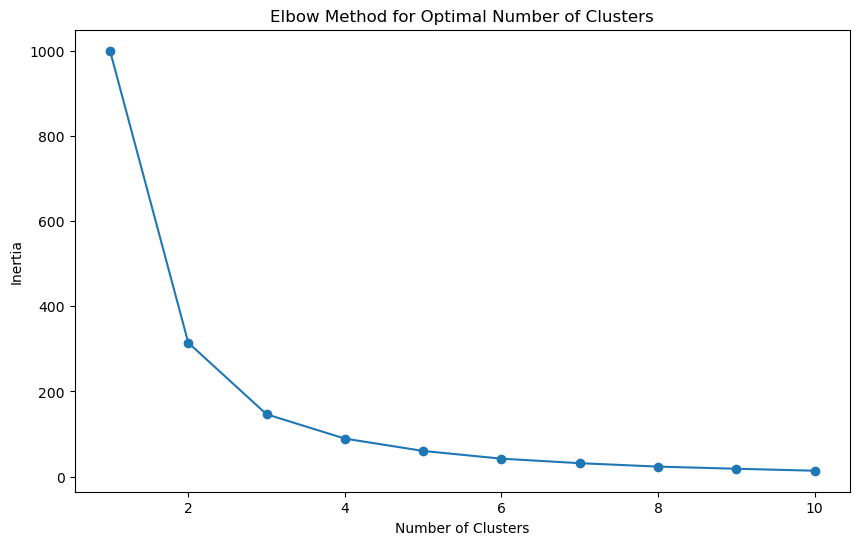

In [57]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [58]:
optimal_clusters = 3  # Adjust this based on the plot

In [60]:
# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#Analyze the 'Cluster' column to understand customer segmentation
print(df['Cluster'].value_counts())

2    389
0    389
1    222
Name: Cluster, dtype: int64


In [64]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age_class,Cluster
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60-69,1
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50-59,1
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,50-59,1
3,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,40-49,1
4,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,50-59,1


In [71]:
df_count = df.groupby(['Cluster'])[['first_name']].count().reset_index()
df_count.columns = ['Cluster', 'Count']

In [72]:
df_count.head()

,Cluster,Count
0,0,389
1,1,222
2,2,389


In [77]:
df.to_csv('df_final.csv', index=False)